In [421]:
from sympy import Symbol, plot, solve, Sum, Rational, floor, maximum
from sympy.stats import Hypergeometric, density, Binomial
from sympy import Function

n1 = Symbol("n1")

In [276]:
floor(2.3)

2

In [2]:
bucket = 1
items = 1000
item = 500
trials = 2
assert items>item, "itemas > item"
print("buckets:", trials+1)
print(f"Items: 0-{items-1}: \n" + "".join("[_]" if i!=bucket else f"[{item}]" for i in range(trials+1)))
print()
print(f"Items: 0-{1}: \n" + "".join("[_]" if i!=bucket else f"[{item/items:f}]" for i in range(trials+1)))

print(density(Hypergeometric('H', items-1, item, trials))(bucket).evalf())
density(Binomial("X", trials, item/items))(bucket)

buckets: 3
Items: 0-999: 
[_][500][_]

Items: 0-1: 
[_][0.500000][_]
0.500500500500501


0.500000000000000

In [658]:
from functools import lru_cache
from itertools import pairwise

from sympy import S

#@lru_cache
def pb(bucket, items, buckets):
    trials = buckets -1 
    return density(Hypergeometric('H', items-1, n1, trials))(bucket)

def hp(buckets, items):
    return (pb(i, items, buckets) for i in range(buckets))

def p_cuts(buckets, items):
    return (solve(a-b) for a,b in pairwise(hp(buckets, items)))

def opt_cuts(buckets, items):
    yield 0
    cuts = p_cuts(buckets, items)
    cut = next(cuts)
    yield cut[0] if isinstance(cut,list) else cut
    for cut in cuts:
        yield cut[1]
    yield items-1
        
def round_cuts(buckets, items):
    return (floor(i) for i in opt_cuts(buckets, items))

# @lru_cache
def cuts(buckets, items):
    r_c = round_cuts(buckets, items)
    a, b = 0, next(r_c)
    for i in r_c:
        b = i
        yield a, b  
        a = b+1


class opt_min(Function):
    @classmethod
    def eval(cls, n, buckets, items):
        print('min', n)
        if n == 0:
            return 0
        else:
            sol = solve(pb(n, items, buckets)-pb(n-1, items, buckets))
            return floor(sol[0])+1
        
class opt_max(Function):
    @classmethod
    def eval(cls, n, buckets, items):
        print('max', n, buckets, items)
        if n == buckets-1:
            return items-1
        else:
            sol = solve(pb(n, items, buckets)-pb(n+1,items, buckets), n1)
            return floor(sol[0])

def P(buckets, items):
    # min included max not included, as python convention
    if buckets ==1 :
        return 1
    class pn(Function):
        @classmethod
        def eval(cls, n):
            return P(buckets-1, n)
        
    #opt_min = Function("optmin")
    #opt_max = Function("optmax")
    b1 = Symbol("b1")
    s = sum(Sum(pb(b, items, buckets)* pn(items-n1) * pn(n1+1), (n1, opt_min(b, buckets, items), opt_max(b, buckets, items))) for b in range(buckets))
    #s = Sum(Sum(pb(b1, items, buckets)* pn(items-n1) * pn(n1+1), (n1, opt_min(b), opt_max(b))), (b1, 0, bucket))
    return s * (items)**-1

In [659]:
P(2, 3)

min 0
max 0 2 3
min 1
max 1 2 3


0.333333333333333*Sum(n1/2, (n1, 2, 2)) + 0.333333333333333*Sum(1 - n1/2, (n1, 0, 1))

In [647]:
P(2, 3)

0.333333333333333*Sum(n1/2, (n1, 2, 2)) + 0.333333333333333*Sum(1 - n1/2, (n1, 0, 1))

In [657]:
P(2, 3)

min 0
max 0 2 3
min 1
max 1 2 3


0.333333333333333*Sum(n1/2, (n1, 2, 2)) + 0.333333333333333*Sum(1 - n1/2, (n1, 0, 1))

In [660]:
P(3,3)# .evalf()

min 0
max 0 2 3 - n1
min 1
max 1 2 3 - n1
min 0
max 0 2 n1 + 1


IndexError: list index out of range

min 0 [2]
0 2 3


KeyboardInterrupt: 

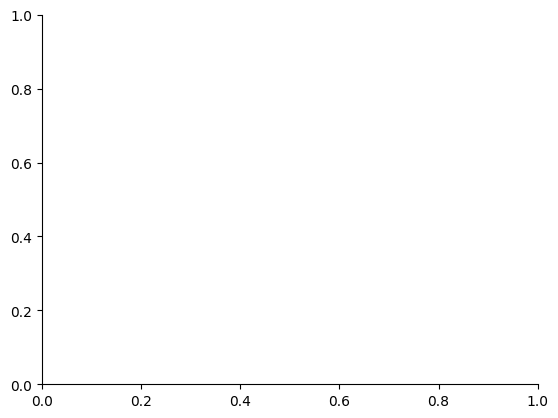

In [605]:
P(2, 3)

min 0 [2]
0 2 3


KeyboardInterrupt: 

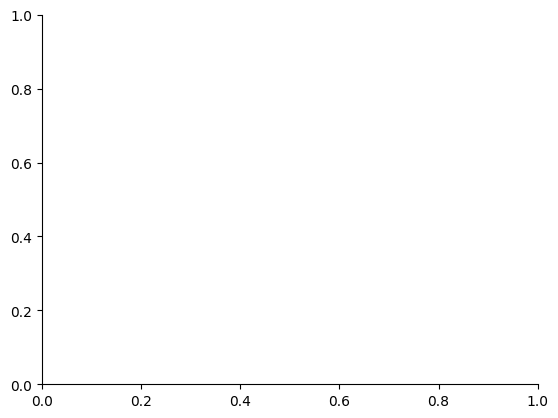

min 0 [1]
0 2


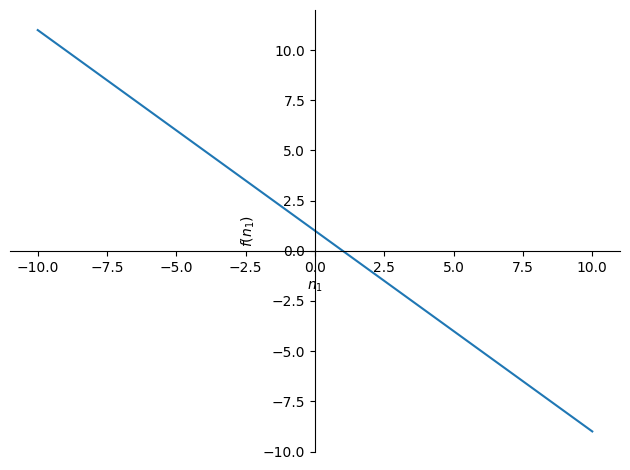

max 0 [1/2]
min 1 [1/2]
1 2


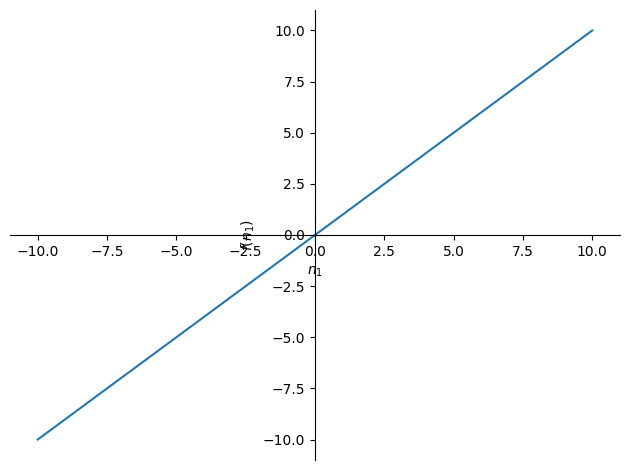

max 1 [0]


0.5*Sum(n1, (n1, 0, 1)) + 0.5*Sum(1 - n1, (n1, 0, 0))

In [590]:
# print(P(2, 2).evalf())
P(2, 2)


min 0 []
0 2


KeyboardInterrupt: 

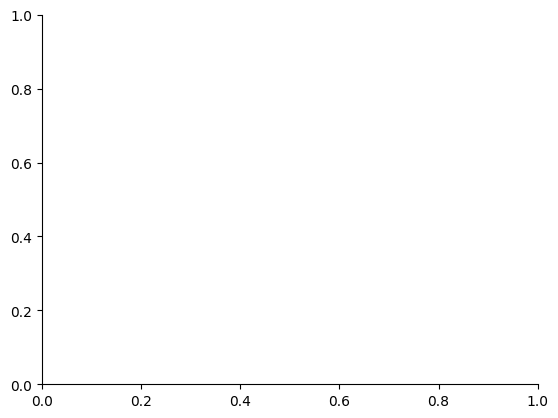

In [300]:
list(p_cuts(3,3))

[[1/3, 2], [0, 5/3]]

In [301]:
list(opt_cuts(3,3))

[0, 1/3, 5/3, 2]

In [305]:
P(3, 3)

IndexError: list index out of range

In [191]:
P(2, 3).evalf().evalf().evalf()

TypeError: pn takes exactly 2 arguments (1 given)

In [115]:
p = Po(2, 0, 2)
p

Sum(n1/2, (n1, 2, 2))/3 + Sum(1 - n1/2, (n1, 0, 1))/3

In [63]:
P(3, 0, 100) #.evalf()

IndexError: list index out of range

In [56]:
P(6, 0, 100).evalf()

0.292234077184281

Buckets: 3


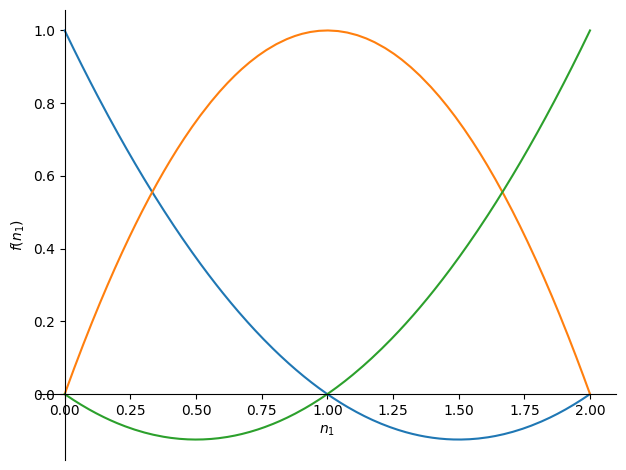

In [472]:
buckets = 3
print("Buckets:",buckets)
plot(*hp(buckets, buckets), (n1, 0,buckets-1))
plot(*hp(buckets, buckets), (n1, 0,buckets-1))


Buckets: 3


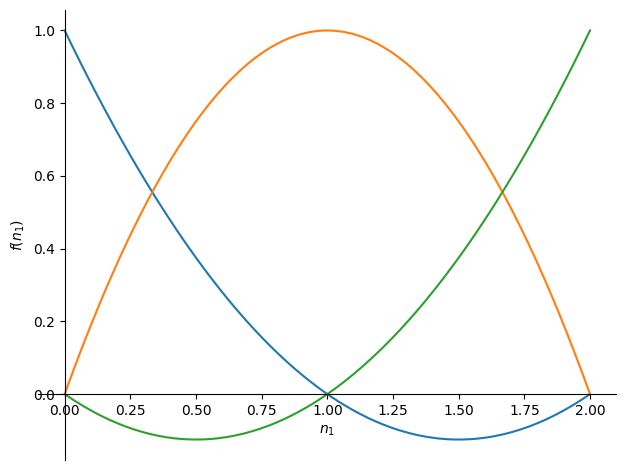

In [320]:
buckets = 3
print("Buckets:",buckets)
plot(*hp(buckets, 3), (n1, 0,2))
plot(*hp(buckets, 11), (n1, 0,10))
plot(*hp(4, 4), (n1, 0,3))
plot(*hp(4, 5), (n1, 0,4))

In [151]:
list(hp(4, 5))[0].evalf(subs={n1:0})

1.00000000000000